In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

print("Lütfen edgesIsparta.csv dosyanızı yükleyin.")
uploaded = files.upload()

Lütfen edgesIsparta.csv dosyanızı yükleyin.


Saving edgesIsparta.csv to edgesIsparta.csv


In [4]:
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path, delimiter=";")

In [5]:
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['Köy1'], row['Köy2'], weight=row['Mesafe'])

**Graf Görselleştirme**

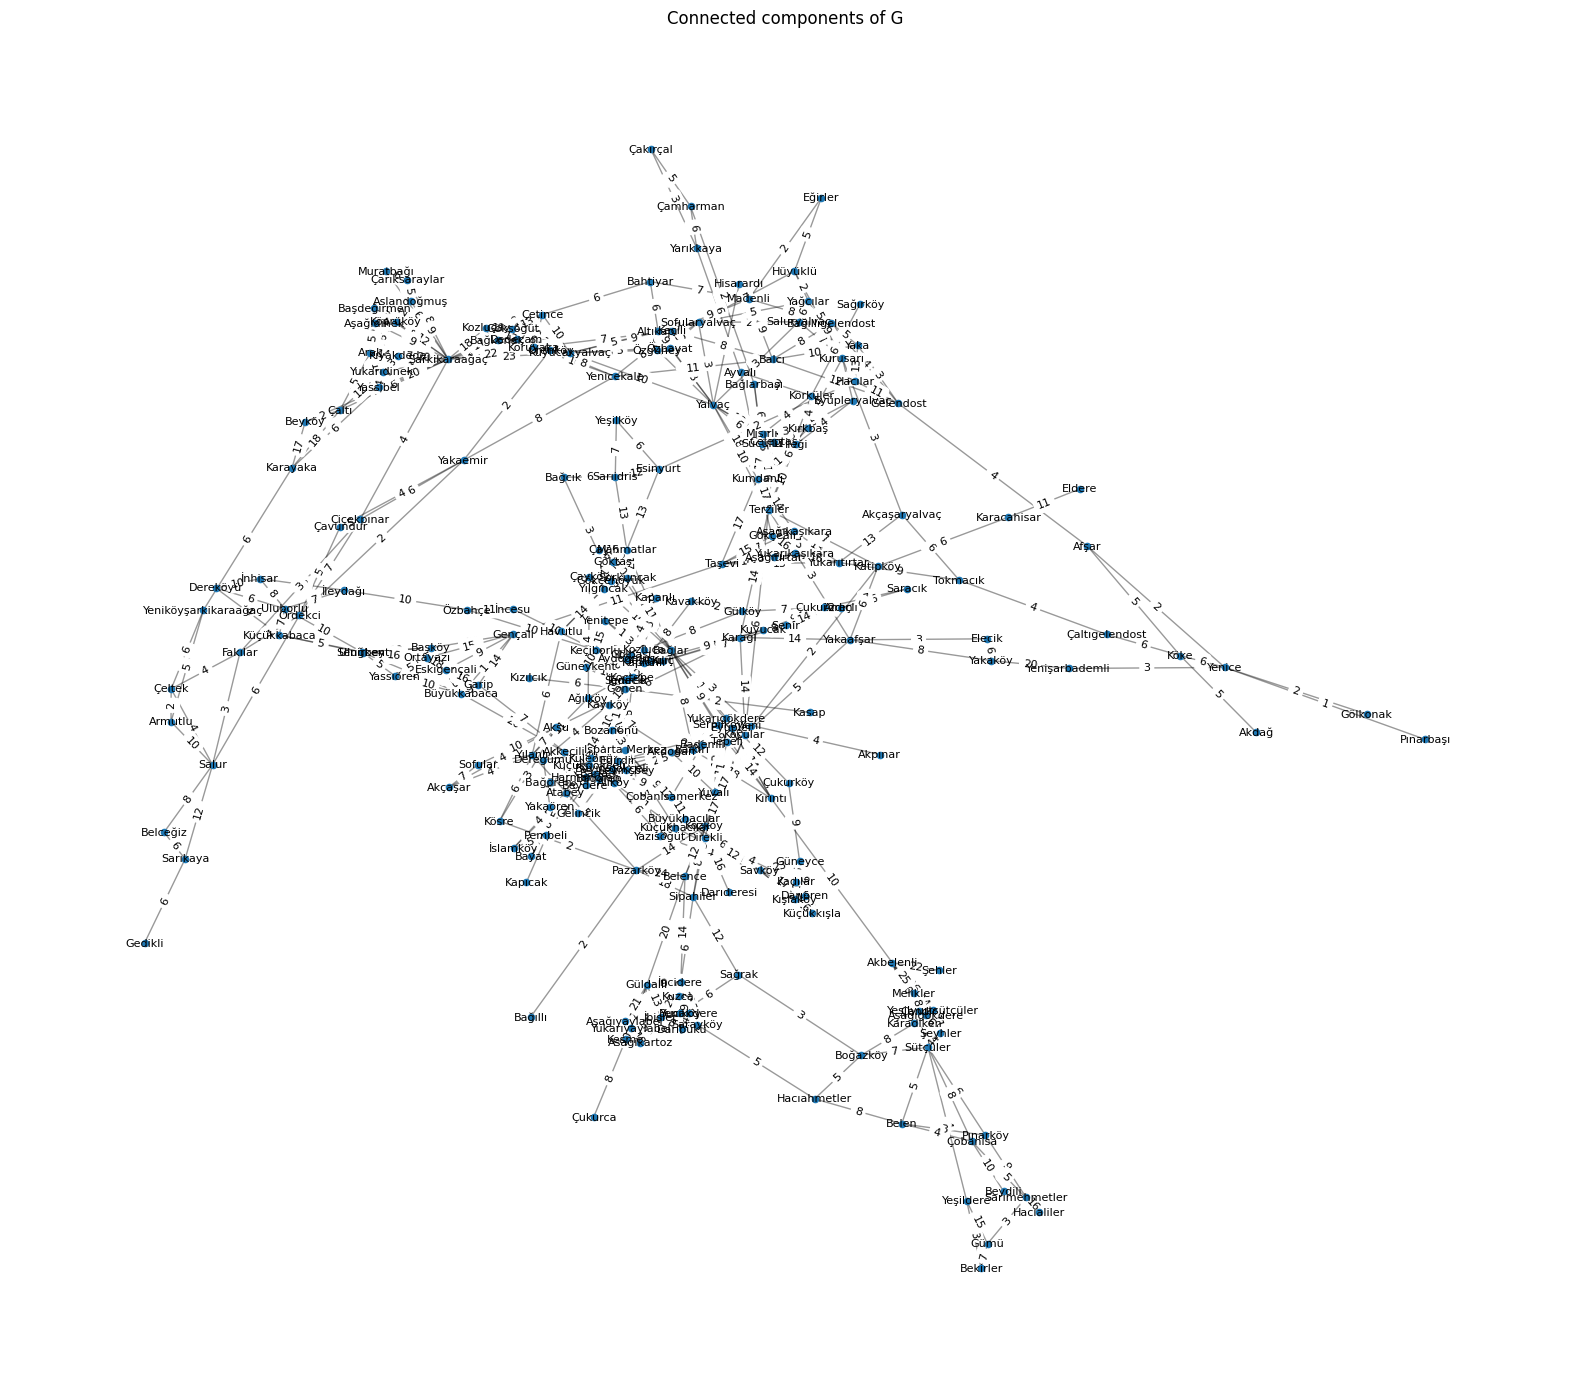

In [7]:
fig = plt.figure("Degree of a random graph", figsize=(20, 30))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
nx.draw_networkx_labels(Gcc, pos, ax=ax0, font_size=8)
edge_labels = nx.get_edge_attributes(Gcc, 'weight')
nx.draw_networkx_edge_labels(Gcc, pos, edge_labels=edge_labels, ax=ax0, font_size=8)
ax0.set_title("Connected components of G")
ax0.set_axis_off()
plt.show()

**Örnek En kısa Yol**

In [9]:
print("En kısa yol (örnek):")
print(nx.shortest_path(G, "Yenitepe", "Gedikli", weight="weight"))


En kısa yol (örnek):
['Yenitepe', 'Yeşilyurt', 'Senirce', 'Kuleönü', 'Eğirdir', 'Yeni', 'Bağlar', 'Mahmatlar', 'Esinyurt', 'Hacılar', 'Yaka', 'Balcı', 'Yenicekale', 'Yakaemir', 'Ördekci', 'Salur', 'Sarıkaya', 'Gedikli']
